In [8]:
from tensorflow.keras.models import load_model
from glob import glob
from sklearn.preprocessing import StandardScaler
import mne
from matplotlib import pyplot
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf

In [2]:
model_paths = ['models/global_model.h5','models/global_model_for_loss.h5','models/local_model_0.h5','models/local_model_1.h5','models/local_model_2.h5','models/local_model_3.h5','models/local_model_4.h5','models/local_model_5.h5','models/local_model_6.h5','models/local_model_7.h5','models/local_model_8.h5','models/local_model_9.h5']
models = [load_model(model_path) for model_path in model_paths]

In [4]:
models[0].get_weights()

[array([[[-1.34307429e-01, -1.03277206e-01, -2.71400511e-01,
          -2.04409376e-01,  1.62703440e-01],
         [-1.60609469e-01, -1.16176337e-01, -1.01010598e-01,
          -5.25871180e-02, -3.50244120e-02],
         [ 6.29184172e-02, -3.40943448e-02, -2.01152146e-01,
          -2.49669030e-02, -8.22337121e-02],
         [-7.17088282e-02,  2.06801176e-01,  1.83970854e-01,
          -7.06896558e-02, -9.47116613e-02],
         [-9.21227112e-02, -2.57482201e-01, -1.17172949e-01,
           8.07755515e-02, -2.42723450e-01],
         [-6.29454404e-02,  3.81139591e-02, -1.54402599e-01,
           1.82798043e-01, -2.36042246e-01],
         [ 1.61125124e-01,  2.11952478e-01, -3.50720398e-02,
           7.91644007e-02, -1.62217185e-01],
         [-1.90788180e-01,  2.65067872e-02, -1.56993672e-01,
           3.51151265e-02,  1.96613282e-01],
         [ 1.70669720e-01,  1.81589514e-01,  2.93802414e-02,
          -2.58259684e-01, -2.31674552e-01],
         [ 6.00286294e-04,  1.36489779e-01, -1

In [6]:
models[1].get_weights()

[array([[[-1.33253694e-01, -1.01576544e-01, -2.75186628e-01,
          -2.01550722e-01,  1.61776647e-01],
         [-1.63000911e-01, -1.12961732e-01, -9.65678170e-02,
          -5.38138933e-02, -3.22208069e-02],
         [ 6.29164949e-02, -3.14184166e-02, -2.03566223e-01,
          -2.48922277e-02, -8.27305168e-02],
         [-7.27323219e-02,  2.07458541e-01,  1.82626799e-01,
          -7.19821379e-02, -9.50811803e-02],
         [-9.04273987e-02, -2.61593491e-01, -1.14265874e-01,
           8.04944634e-02, -2.41888046e-01],
         [-6.36149719e-02,  3.61504667e-02, -1.52325511e-01,
           1.83013156e-01, -2.38199115e-01],
         [ 1.62515387e-01,  2.10159466e-01, -3.60865071e-02,
           7.76957124e-02, -1.63889781e-01],
         [-1.91015258e-01,  2.60822549e-02, -1.58013687e-01,
           3.63433138e-02,  1.96829632e-01],
         [ 1.72653601e-01,  1.78984269e-01,  3.23876143e-02,
          -2.59793073e-01, -2.31229156e-01],
         [-1.57907050e-06,  1.34198114e-01, -1

In [7]:
res=[x - y for x, y in zip(models[0].get_weights(), models[1].get_weights())]
res

[array([[[-1.05373561e-03, -1.70066208e-03,  3.78611684e-03,
          -2.85865366e-03,  9.26792622e-04],
         [ 2.39144266e-03, -3.21460515e-03, -4.44278121e-03,
           1.22677535e-03, -2.80360505e-03],
         [ 1.92224979e-06, -2.67592818e-03,  2.41407752e-03,
          -7.46753067e-05,  4.96804714e-04],
         [ 1.02349371e-03, -6.57364726e-04,  1.34405494e-03,
           1.29248202e-03,  3.69518995e-04],
         [-1.69531256e-03,  4.11128998e-03, -2.90707499e-03,
           2.81088054e-04, -8.35403800e-04],
         [ 6.69531524e-04,  1.96349248e-03, -2.07708776e-03,
          -2.15113163e-04,  2.15686858e-03],
         [-1.39026344e-03,  1.79301202e-03,  1.01446733e-03,
           1.46868825e-03,  1.67259574e-03],
         [ 2.27078795e-04,  4.24532220e-04,  1.02001429e-03,
          -1.22818723e-03, -2.16349959e-04],
         [-1.98388100e-03,  2.60524452e-03, -3.00737284e-03,
           1.53338909e-03, -4.45395708e-04],
         [ 6.01865351e-04,  2.29166448e-03, -3

In [16]:
res_sum = [np.ones_like(w) for w in models[0].get_weights()]
res_sum

[array([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],
 
        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
     

In [21]:
res_sum=[np.add(x, y) for x, y in zip(res, res_sum)]
res_sum

[array([[[0.9978925 , 0.9965987 , 1.0075722 , 0.9942827 , 1.0018535 ],
         [1.0047829 , 0.9935708 , 0.9911144 , 1.0024536 , 0.99439275],
         [1.0000038 , 0.9946481 , 1.0048282 , 0.99985063, 1.0009937 ],
         [1.0020471 , 0.99868524, 1.0026882 , 1.0025849 , 1.0007391 ],
         [0.99660933, 1.0082226 , 0.9941858 , 1.0005622 , 0.99832916],
         [1.001339  , 1.003927  , 0.9958458 , 0.9995698 , 1.0043137 ],
         [0.99721944, 1.003586  , 1.002029  , 1.0029373 , 1.0033453 ],
         [1.0004542 , 1.000849  , 1.0020399 , 0.9975436 , 0.9995673 ],
         [0.99603224, 1.0052104 , 0.9939853 , 1.0030668 , 0.99910927],
         [1.0012038 , 1.0045834 , 0.9999243 , 0.9957526 , 0.99671185],
         [1.0034075 , 1.0031962 , 1.0049226 , 1.001713  , 1.0077171 ],
         [0.9999553 , 1.0001485 , 0.99649644, 1.0018654 , 0.99596167],
         [1.0021195 , 1.0060186 , 1.0019855 , 1.0032332 , 1.0011921 ],
         [1.0064931 , 0.9984962 , 1.0055437 , 1.0032845 , 1.004334  ],
      

In [28]:
for i in range(len(res_sum)):
    res_sum[i] /= 2

res_sum

[array([[[0.49894625, 0.49829936, 0.5037861 , 0.49714136, 0.50092673],
         [0.50239146, 0.4967854 , 0.4955572 , 0.5012268 , 0.49719638],
         [0.5000019 , 0.49732405, 0.5024141 , 0.49992532, 0.50049686],
         [0.50102353, 0.49934262, 0.5013441 , 0.50129247, 0.50036955],
         [0.49830467, 0.5041113 , 0.4970929 , 0.5002811 , 0.49916458],
         [0.5006695 , 0.5019635 , 0.4979229 , 0.4997849 , 0.50215685],
         [0.49860972, 0.501793  , 0.5010145 , 0.50146866, 0.5016726 ],
         [0.5002271 , 0.5004245 , 0.50101995, 0.4987718 , 0.49978364],
         [0.49801612, 0.5026052 , 0.49699265, 0.5015334 , 0.49955463],
         [0.5006019 , 0.5022917 , 0.49996215, 0.4978763 , 0.49835593],
         [0.50170374, 0.5015981 , 0.5024613 , 0.5008565 , 0.50385857],
         [0.49997765, 0.50007427, 0.49824822, 0.5009327 , 0.49798083],
         [0.5010598 , 0.5030093 , 0.5009928 , 0.5016166 , 0.50059605],
         [0.50324655, 0.4992481 , 0.50277185, 0.5016422 , 0.502167  ],
      

In [3]:
all_files_path=glob('../test/*.edf')
all_files_path

['../test\\H S1 EC.edf',
 '../test\\H S10 EO.edf',
 '../test\\H S14 EC.edf',
 '../test\\H S19 TASK.edf',
 '../test\\H S23 EC.edf',
 '../test\\H S27 TASK.edf',
 '../test\\H S30 EO.edf',
 '../test\\H S4 TASK.edf',
 '../test\\H S7 EO.edf',
 '../test\\MDD S1  EO.edf',
 '../test\\MDD S10 EC.edf',
 '../test\\MDD S14 TASK.edf',
 '../test\\MDD S20 EO.edf',
 '../test\\MDD S25 EC.edf',
 '../test\\MDD S29 TASK.edf',
 '../test\\MDD S3 TASK.edf',
 '../test\\MDD S34 TASK.edf',
 '../test\\MDD S6 EC.edf']

In [17]:
all_files_path=glob('../test/*.edf')
print(len(all_files_path))
healthy_file_path=[i for i in all_files_path if  'H' in i.split('\\')[1]]
patient_file_path=[i for i in all_files_path if  'M' in i.split('\\')[1]]

print(len(healthy_file_path),len(patient_file_path))
def read_data(file_path):
    raw = mne.io.read_raw_edf(file_path, preload=True)
    # Select a specific channel
    channel_to_keep = ['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE', 'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE', 'EEG A2-A1']  
      
    # Replace with the name of the channel you want to keep
    raw.pick_channels(channel_to_keep)
    raw.set_eeg_reference()
    raw.filter(l_freq=30,h_freq=100)#1-4=delta, 4-8=theta, 8-12=alpha, 12-30=beta, 30-100=gamma
    epochs=mne.make_fixed_length_epochs(raw,duration=15,overlap=1)
    epochs=epochs.get_data()
    scaler = StandardScaler()
    data = scaler.fit_transform(epochs.reshape(-1,epochs.shape[-1])).reshape(epochs.shape)
    return data #trials,channel,length

18
9 9


In [18]:
%%capture
control_epochs_array=[read_data(subject) for subject in healthy_file_path]
patients_epochs_array=[read_data(subject) for subject in patient_file_path]

In [13]:
control_epochs_labels=[len(i)*[0] for i in control_epochs_array]
patients_epochs_labels=[len(i)*[1] for i in patients_epochs_array]
print(len(control_epochs_labels),len(patients_epochs_labels))
data_list=control_epochs_array+patients_epochs_array
label_list=control_epochs_labels+patients_epochs_labels
print(len(data_list),len(label_list))
data_array=np.vstack(data_list)
label_array=np.hstack(label_list)
data_array=np.moveaxis(data_array,1,2)

9 9
18 18


In [19]:
acc = []
pre=[]
rec=[]
f1=[]
for i in range(1, len(models)+1):
    single_score = models[i-1].evaluate(data_array, label_array)
    acc.append(single_score[1])
    pre.append(single_score[2])
    rec.append(single_score[3])
    # f1sc=2*((single_score[2]*single_score[3])/(single_score[2]+single_score[3]))
    # f1.append(f1sc)

17/17 [==============================] - 1s 28ms/step - loss: 1.5353 - Accuracy: 0.6980 - precision: 0.6784 - recall: 0.8112 - auc: 0.7686   


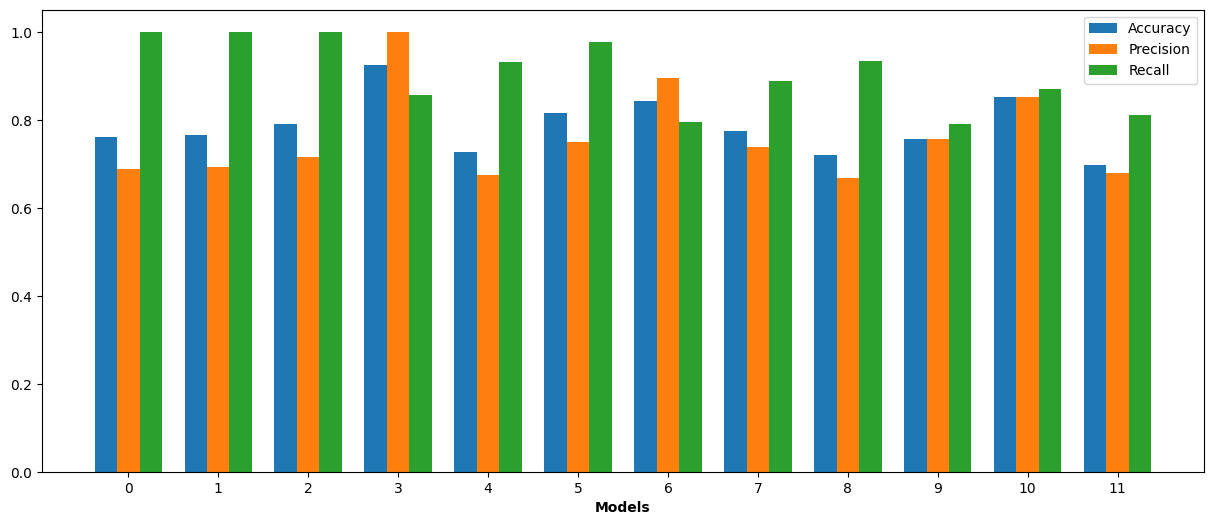

In [20]:
# Resize the plot
pyplot.figure(figsize=(15, 6))
# Bar width
bar_width = 0.25

# Set positions for bars on X-axis
r1 = np.arange(len(model_paths))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
# Create the bar chart
pyplot.bar(r1, acc, width=bar_width, label='Accuracy')
pyplot.bar(r2, pre, width=bar_width, label='Precision')
pyplot.bar(r3, rec, width=bar_width, label='Recall')
# pyplot.bar(r4, f1_scores, width=bar_width, label='F1 Score')

# Add labels and title
pyplot.xlabel('Models', fontweight='bold')
# pyplot.ylabel('evalution with Loss', fontweight='bold')
pyplot.xticks([r + bar_width for r in range(12)], range(12))
pyplot.legend()

# Show the plot
pyplot.show()